You are provided with a dataset (heart_disease.csv) containing the following columns:

* **age**: Age of the individual
* **sex**: Gender of the individual (0 = female, 1 = male)
* **chest pain type**: Type of chest pain (4 categories: 0-3)
* **resting blood pressure**: Resting blood pressure (in mm Hg)
* **serum cholesterol**: Cholesterol level (in mg/dl)
* **fasting blood sugar**: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
* **resting electrocardiographic results**: ECG results (0 = normal, 1 = ST-T abnormality, 2 = probable/definite left ventricular hypertrophy)
* **maximum heart rate achieved**
* **exercise induced angina**: Exercise-induced chest pain (1 = yes, 0 = no)
* **oldpeak**: ST depression induced by exercise relative to rest
* **slope**: The slope of the peak exercise ST segment (0-2)
* **number of major vessels**: Number of major vessels (0-3) colored by fluoroscopy
* **thal**: Type of thalassemia (0 = normal, 1 = fixed defect, 2 = reversible defect)
* **target**: Presence of heart disease (1 = Yes, 0 = No)

## Libraries

In [296]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

##**Step 1: Load and Explore the Data**
Load the dataset into a Pandas DataFrame.

Perform exploratory data analysis (EDA):

  * Check for missing values, data types, and summary statistics.
  * Identify potential outliers in numerical columns.
  * Analyze the distribution of categorical variables.

In [297]:
df = pd.read_csv('heart_disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [298]:
print(" shape of the data is " , df.shape)
print('\n')
# we can get datatype and information about null value in one single function.
df.info()

 shape of the data is  (1025, 14)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [299]:
print(" From the info, we can infer that the data has no missing values (null values).")
print(" all columns have numerical data ( either int or float). ")

 From the info, we can infer that the data has no missing values (null values).
 all columns have numerical data ( either int or float). 


In [300]:
# Check for missing values
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [301]:
# Summary statistics.
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [302]:
# column_names = df.columns.tolist()
# # plotting box plot to identify outliers in each column separately.
# for col in column_names:
#   plt.boxplot(df[col])
#   plt.title(col)
#   plt.show()


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(1, 0, 'age'),
  Text(2, 0, 'sex'),
  Text(3, 0, 'cp'),
  Text(4, 0, 'trestbps'),
  Text(5, 0, 'chol'),
  Text(6, 0, 'fbs'),
  Text(7, 0, 'restecg'),
  Text(8, 0, 'thalach'),
  Text(9, 0, 'exang'),
  Text(10, 0, 'oldpeak'),
  Text(11, 0, 'slope'),
  Text(12, 0, 'ca'),
  Text(13, 0, 'thal'),
  Text(14, 0, 'target')])

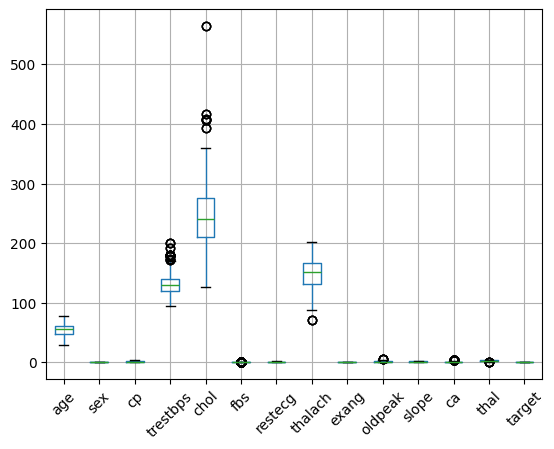

In [303]:
df.boxplot()
plt.xticks(rotation=45)

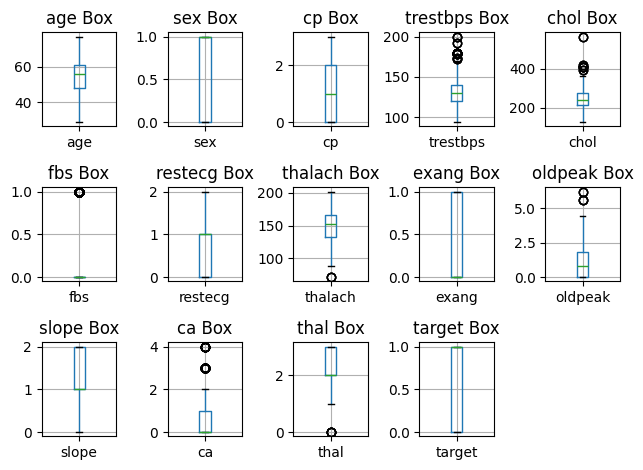

In [304]:
# Scale of all the numerical data are not in the same range. so, to get the inference in a glance,
# we arrange them in a subplot of 3 rows and 5 columns.

def plot_box_for_df( datafrm, rows, cols ):     # function written to plot boxplots as subplots in a generic way.
  plot_position = 1     # variable introduced to make positioning of the plot easier.
  for col in datafrm.columns:
    plt.subplot( rows, cols, plot_position )
    datafrm[[col]].boxplot()
    plt.xticks(rotation=0)
    plt.title(col+' Box')
    plot_position += 1  # increments plot_position to fix the plot position

  plt.tight_layout()        # makes sure that the plots do not overlap each other.
  plt.show()

plot_box_for_df(df, 3, 5)


In [305]:
print(" From the boxplot, we can infer that the following columns have outliers : ['trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca', 'thal']")
print(" but 'fbs, 'ca' and 'thal' are categorical variables. so, we need to be careful while handling outliers in those columns.")
outlier_cols = ['trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal']
df_outlier = df[outlier_cols] # this dataframe has all the columns which have outliers present.

 From the boxplot, we can infer that the following columns have outliers : ['trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca', 'thal']
 but 'fbs, 'ca' and 'thal' are categorical variables. so, we need to be careful while handling outliers in those columns.


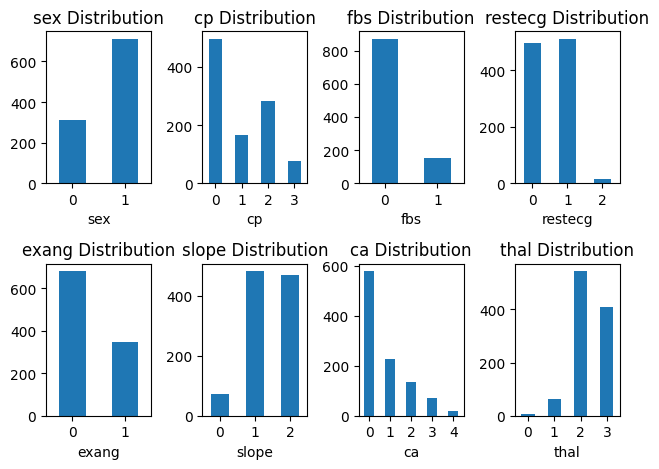

In [306]:
# Analyze the distribution of categorical variables.
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df_cat = df[cat_cols]

# Function to plot bar graphs in a subplot.
def plot_bar_for_df(datafrm, rows, cols, graph_type):
  plot_position = 1     # variable introduced to make positioning of the plot easier.
  for col in datafrm.columns:
    plt.subplot(rows, cols, plot_position)
    datafrm[col].value_counts().sort_index().plot(kind=graph_type)  # here, sorting is done based on count.
    #datafrm[col].value_counts().plot(kind=graph_type)               # here, sorting is done based on value.
    plt.xticks(rotation=0)
    plt.title(col+' Distribution')
    plot_position += 1  # increments plot_position to fix the plot position

  plt.tight_layout()        # makes sure that the plots do not overlap each other.
  plt.show()

# fuction call to plot bar graph
plot_bar_for_df(df_cat, 2, 4, 'bar')


##**Step 2: Data Cleaning and Preprocessing**


###**Handle Missing Values (if needed)**:

  * Replace missing numerical values with the mean/median.
  * Replace missing categorical values with the mode.

In [307]:
# Checking number of missing value( null value in each column)
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [308]:
print(" There are no missing / null  values in any of the columns.")
print(" So, there is no need to replacement of values to be done.")

 There are no missing / null  values in any of the columns.
 So, there is no need to replacement of values to be done.


###**Handle Outliers (if needed):**

  * Use appropriate methods (e.g., IQR or z-score) to detect and handle outliers.

<ipython-input-309-2fe2c7e2502c>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[[0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_outlier.clip(lower=lower_bound, upper=upper_bound, inplace=True, axis =1)
<ipython-input-309-2fe2c7e2502c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outlier.clip(lower=lower_bound, upper=upper_bound, inplace=True, axis =1)
<ipython-input-309-2fe2c7e2502c>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[[2.5]
 [2.5]
 [2.5]
 [2.5]
 [2.5]
 [2.5]
 [2.5]
 [2.5]
 [2.5]
 [2.5]
 [2.5]
 [2.5]
 [2.5]
 [2.5]
 [2.5]

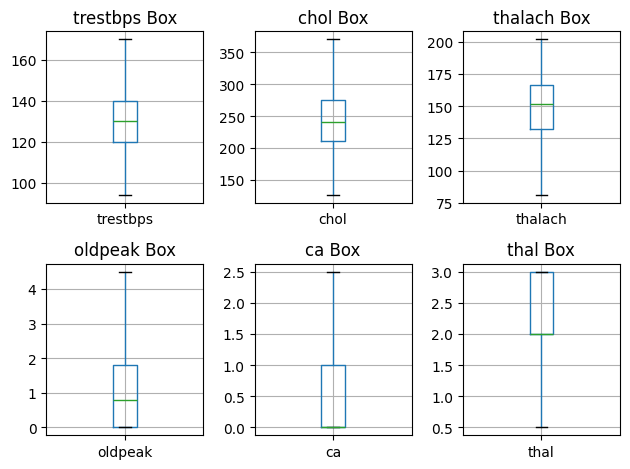

In [309]:
df_outlier # is a dataframe derrived from the main data. it contains all columns with outliers

# finding IQR value for each columns
Q1 = df_outlier.quantile(0.25)
Q3 = df_outlier.quantile(0.75)
IQR = Q3 - Q1

# Defining the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# we clip the upper and lower bound values for all columns in this single line of code.
df_outlier.clip(lower=lower_bound, upper=upper_bound, inplace=True, axis =1)

plot_box_for_df(df_outlier, 2, 3)             # function call 'plot_boxplots()' to see box plots

In [310]:
df_outlier.info()
df.info()
# observing that 'ca' and 'thal' were having datatype as integer in the beginning ( in df).
# after clipping the outliers to upper bound and lower bound, we introduced new float values
# resulting in change of datatype for both the columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   trestbps  1025 non-null   int64  
 1   chol      1025 non-null   int64  
 2   thalach   1025 non-null   int64  
 3   oldpeak   1025 non-null   float64
 4   ca        1025 non-null   float64
 5   thal      1025 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 48.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int

 since 'ca' and 'thal' columns are categorical values, having a float value is not acceptable.
ca
0.0    578
1.0    226
2.0    134
2.5     87
Name: count, dtype: int64
thal
2.0    544
3.0    410
1.0     64
0.5      7
Name: count, dtype: int64

 After outliers are handled completely. 
ca
0.0    578
1.0    226
2.0    221
Name: count, dtype: int64
thal
2.0    544
3.0    410
1.0     71
Name: count, dtype: int64


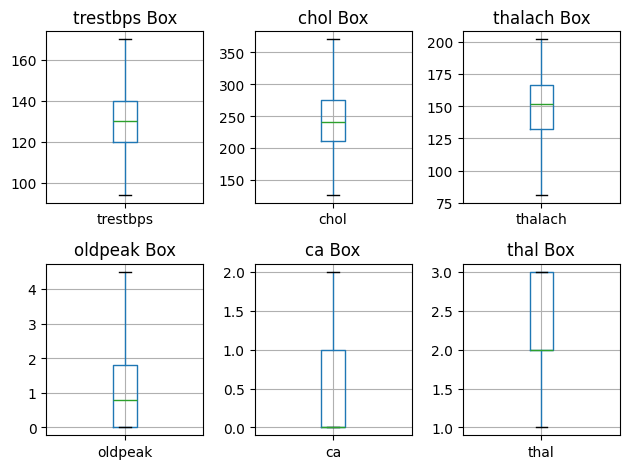

In [311]:
print(" since 'ca' and 'thal' columns are categorical values, having a float value is not acceptable.")

# checking number of points with the issue to decide whether to
# remove the rows or replace the values or retain the original values.
print(df_outlier['ca'].value_counts())
print(df_outlier['thal'].value_counts())

# # CASE: 1 deciding to retain the original values.
# df_outlier['ca'] = df['ca']
# df_outlier['thal'] = df['thal']

# CASE: 2 deciding to replace the values. since it is a categorical column, we use mode to replace
df_outlier.loc[df_outlier['ca'] == 2.5 , 'ca'] = sorted(df_outlier['ca'].unique())[-2] #df_outlier['ca'].mode()[0]
df_outlier.loc[df_outlier['thal'] == 0.5, 'thal'] = sorted(df_outlier['thal'].unique())[1] #df_outlier['thal'].mode()[0]

# # CASE: 3 deciding to replace the values. since it is a categorical column, we use mode to replace
# df_outlier.loc[df_outlier['ca'] == 2.5 , 'ca'] = df_outlier['ca'].mode()[0]
# df_outlier.loc[df_outlier['thal'] == 0.5, 'thal'] = df_outlier['thal'].mode()[0]

# # CASE: 4 deciding to remove rows
# df_outlier = df_outlier.drop(df_outlier[df_outlier['ca'] == 2.5].index)
# df_outlier = df_outlier.drop(df_outlier[df_outlier['thal'] == 0.5].index)

print('\n'" After outliers are handled completely. ")
print(df_outlier['ca'].value_counts())
print(df_outlier['thal'].value_counts())

plot_box_for_df(df_outlier, 2, 3)             # function call 'plot_boxplots()' to see box plots

Creating a clean dataset with the preprocessing done so far.

In [312]:
# creating a dataframe to be set as cleaned one
df_clean = df.drop(columns =outlier_cols, axis =1)
df_clean =pd.concat([df_clean, df_outlier], axis=1)
df_clean.head()

,age,sex,cp,fbs,restecg,exang,slope,target,trestbps,chol,thalach,oldpeak,ca,thal
0,52,1,0,0,1,0,2,0,125,212,168,1.0,2.0,3.0
1,53,1,0,1,0,1,0,0,140,203,155,3.1,0.0,3.0
2,70,1,0,0,1,1,0,0,145,174,125,2.6,0.0,3.0
3,61,1,0,0,1,0,2,0,148,203,161,0.0,1.0,3.0
4,62,0,0,1,1,0,1,0,138,294,106,1.9,2.0,2.0


### **Encode Categorical Variables:**

* Use one-hot encoding for multi-category variables (chest pain type, resting electrocardiographic results, thal).
* Use binary encoding for 'sex' and 'fasting blood sugar'.

In [313]:
# does one hot encoding on columns ['cp','restecg','thal'].
df_OHE = pd.get_dummies(df_clean,columns=['cp','restecg','thal'], dtype=int)
# since the values from this column has been One hot encoded, these columns are removed.
df_OHE.head()


,age,sex,fbs,exang,slope,target,trestbps,chol,thalach,oldpeak,...,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,thal_1.0,thal_2.0,thal_3.0
0,52,1,0,0,2,0,125,212,168,1.0,...,1,0,0,0,0,1,0,0,0,1
1,53,1,1,1,0,0,140,203,155,3.1,...,1,0,0,0,1,0,0,0,0,1
2,70,1,0,1,0,0,145,174,125,2.6,...,1,0,0,0,0,1,0,0,0,1
3,61,1,0,0,2,0,148,203,161,0.0,...,1,0,0,0,0,1,0,0,0,1
4,62,0,1,0,1,0,138,294,106,1.9,...,1,0,0,0,0,1,0,0,1,0


In [314]:
print(" values in column 'sex' : ", df_OHE['sex'].unique())
print(" values in column 'fbs' : ", df_OHE['fbs'].unique())

print(" Since the values are already binary, we are not performing binary encoding.")

# # in case we need to do binary encoding,
# label_enc = LabelEncoder()
# df_OHE[['sex', 'fbs']]=label_enc.fit_transform(df_OHE[['sex', 'fbs']])

 values in column 'sex' :  [1 0]
 values in column 'fbs' :  [0 1]
 Since the values are already binary, we are not performing binary encoding.


### **Scale Numerical Features:**

* Scale features such as 'resting blood pressure', 'serum cholesterol', 'maximum heart rate', and 'oldpeak' using StandardScaler or MinMaxScaler.

In [315]:
df_clean.head(2)

,age,sex,cp,fbs,restecg,exang,slope,target,trestbps,chol,thalach,oldpeak,ca,thal
0,52,1,0,0,1,0,2,0,125,212,168,1.0,2.0,3.0
1,53,1,0,1,0,1,0,0,140,203,155,3.1,0.0,3.0



 Bar graph 


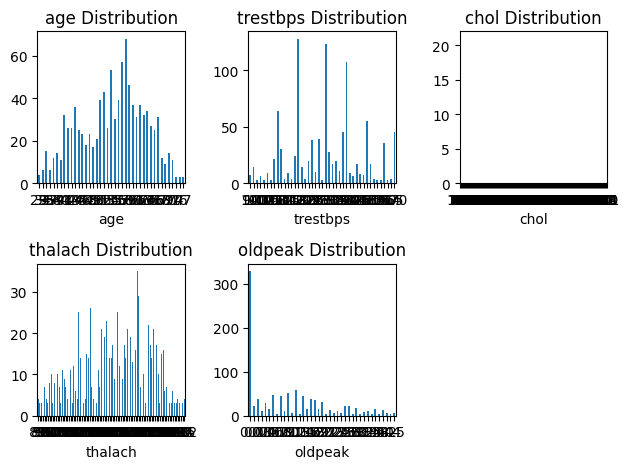


 Histogram


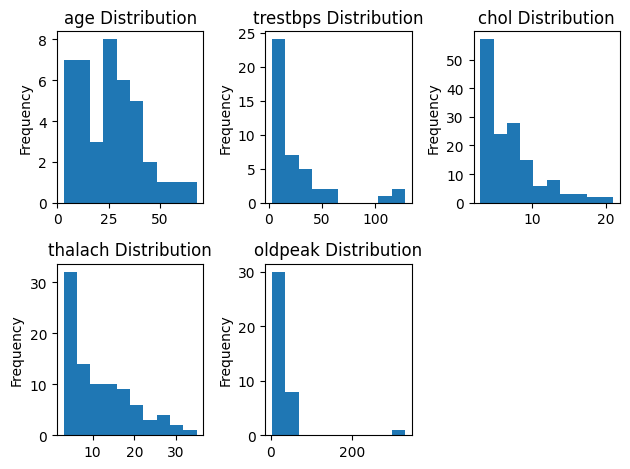


 From the distribution, we observe skewness for trestbps, chol and thalach.
 oldpeak values are on two extremes. we can use min-max scaler for all of them.



,age,trestbps,chol,thalach,oldpeak
0,52,125,212,168,1.0
1,53,140,203,155,3.1
2,70,145,174,125,2.6
3,61,148,203,161,0.0
4,62,138,294,106,1.9


In [316]:
df_scale  = df_clean[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
print('\n'" Bar graph ")
plot_bar_for_df(df_scale, 2, 3, 'bar')
print('\n'" Histogram")
plot_bar_for_df(df_scale, 2, 3, 'hist')

print('\n'" From the distribution, we observe skewness for trestbps, chol and thalach.")
print(" oldpeak values are on two extremes. we can use min-max scaler for all of them."'\n')
df_scale.head()

In [317]:
min_max_scaler = MinMaxScaler()
scale_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df_scale[scale_cols]= min_max_scaler.fit_transform(df_scale[scale_cols])

df_scale.head()

<ipython-input-317-f6afcfde2949>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scale[scale_cols]= min_max_scaler.fit_transform(df_scale[scale_cols])


,age,trestbps,chol,thalach,oldpeak
0,0.479167,0.407895,0.351020,0.719008,0.222222
1,0.500000,0.605263,0.314286,0.611570,0.688889
2,0.854167,0.671053,0.195918,0.363636,0.577778
3,0.666667,0.710526,0.314286,0.661157,0.000000
4,0.687500,0.578947,0.685714,0.206612,0.422222


In [318]:
df_clean.head(2)

,age,sex,cp,fbs,restecg,exang,slope,target,trestbps,chol,thalach,oldpeak,ca,thal
0,52,1,0,0,1,0,2,0,125,212,168,1.0,2.0,3.0
1,53,1,0,1,0,1,0,0,140,203,155,3.1,0.0,3.0


In [319]:
# replacing the values in df_clean by scaled values from df_scale.
df_clean = df_clean.drop(columns =['age','trestbps', 'chol', 'thalach', 'oldpeak'], axis =1)
df_clean =pd.concat([df_clean, df_scale], axis=1)
df_clean.head()

,sex,cp,fbs,restecg,exang,slope,target,ca,thal,age,trestbps,chol,thalach,oldpeak
0,1,0,0,1,0,2,0,2.0,3.0,0.479167,0.407895,0.351020,0.719008,0.222222
1,1,0,1,0,1,0,0,0.0,3.0,0.500000,0.605263,0.314286,0.611570,0.688889
2,1,0,0,1,1,0,0,0.0,3.0,0.854167,0.671053,0.195918,0.363636,0.577778
3,1,0,0,1,0,2,0,1.0,3.0,0.666667,0.710526,0.314286,0.661157,0.000000
4,0,0,1,1,0,1,0,2.0,2.0,0.687500,0.578947,0.685714,0.206612,0.422222


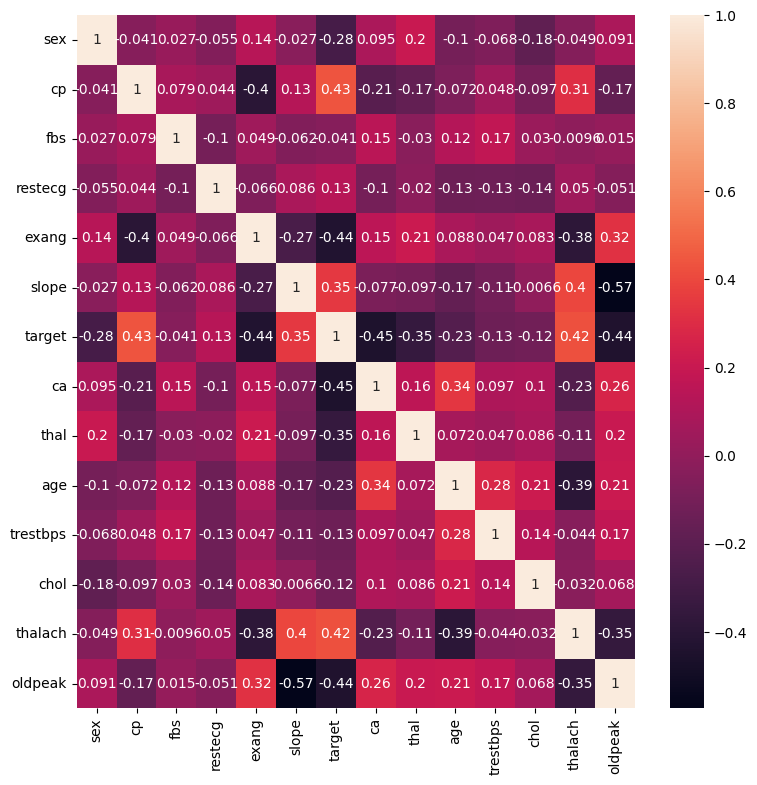


 From the correlation matrix, we can observe how each parameter is correlated others.



In [320]:
# Heatmap to viasualize correlation between all columns.
plt.figure(figsize = (9,9))
sns.heatmap(df_clean.corr(), annot=True)
plt.show()

print('\n'" From the correlation matrix, we can observe how each parameter is correlated others."'\n')

##**Step 3: Train-Test Split**


###**Split the data into training and testing sets:**
* **For Regression**: Predict 'serum cholesterol' as the target variable.
* **For Classification**: Predict 'target' (presence of heart disease) as the target variable.

In [321]:
# if we are doing the prediction/ regression on data with encoded columns
# df_feat_reg = df_OHE.drop(columns='chol', axis=1)
# df_targ_reg = df_OHE['chol']
# df_feat_pred  = df_OHE.drop(columns='target', axis=1)
# df_targ_pred  = df_OHE['target']

df_feat_reg = df_clean.drop(columns='chol', axis=1)
df_targ_reg = df_clean['chol']
df_feat_pred  = df_clean.drop(columns='target', axis=1)
df_targ_pred  = df_clean['target']

In [322]:
# split for regression task.
X_train_reg, X_test_reg, Y_train_reg, Y_test_reg = train_test_split(df_feat_reg, df_targ_reg, test_size=0.2, random_state=3)
# split for classification.
X_train_pre, X_test_pre, Y_train_pre, Y_test_pre = train_test_split(df_feat_pred, df_targ_pred, test_size=0.2, random_state=4)

In [323]:
df_feat_reg.head(3)

,sex,cp,fbs,restecg,exang,slope,target,ca,thal,age,trestbps,thalach,oldpeak
0,1,0,0,1,0,2,0,2.0,3.0,0.479167,0.407895,0.719008,0.222222
1,1,0,1,0,1,0,0,0.0,3.0,0.500000,0.605263,0.611570,0.688889
2,1,0,0,1,1,0,0,0.0,3.0,0.854167,0.671053,0.363636,0.577778


In [324]:
df_targ_reg.head(3)

,chol
0,0.351020
1,0.314286
2,0.195918


In [325]:
df_feat_pred.head(3)

,sex,cp,fbs,restecg,exang,slope,ca,thal,age,trestbps,chol,thalach,oldpeak
0,1,0,0,1,0,2,2.0,3.0,0.479167,0.407895,0.351020,0.719008,0.222222
1,1,0,1,0,1,0,0.0,3.0,0.500000,0.605263,0.314286,0.611570,0.688889
2,1,0,0,1,1,0,0.0,3.0,0.854167,0.671053,0.195918,0.363636,0.577778


In [326]:
df_targ_pred.head(3)

,target
0,0
1,0
2,0


In [327]:
# Function to put scatter plots for each feature vs target.
def plot_scatter_for_df(model, df_feature_train, df_target_train, rows, cols):
  plt.figure(figsize = (9,9))
  plot_position = 1     # variable introduced to make positioning of the plot easier.

  for col in df_feature_train.columns:
    feat_vals = df_feature_train[[col]].values.reshape(-1,1)
    model.fit(feat_vals, df_target_train)
    predicted_target = model.predict(feat_vals)
    plt.subplot(rows, cols, plot_position)
    plt.scatter(df_feature_train[col], df_target_train, label = col)
    plt.plot(df_feature_train[col], predicted_target, color = "red", label = "predicted Line")
    plt.xticks(rotation=0)
    plt.title(col+' Distribution')
    plot_position += 1  # increments plot_position to fix the plot position
  plt.tight_layout()    # makes sure that the plots do not overlap each other.
  plt.show()

##**Step 4: Build Machine Learning Models**


### **Regression Task:**

* Train a Linear Regression model to predict serum cholesterol.


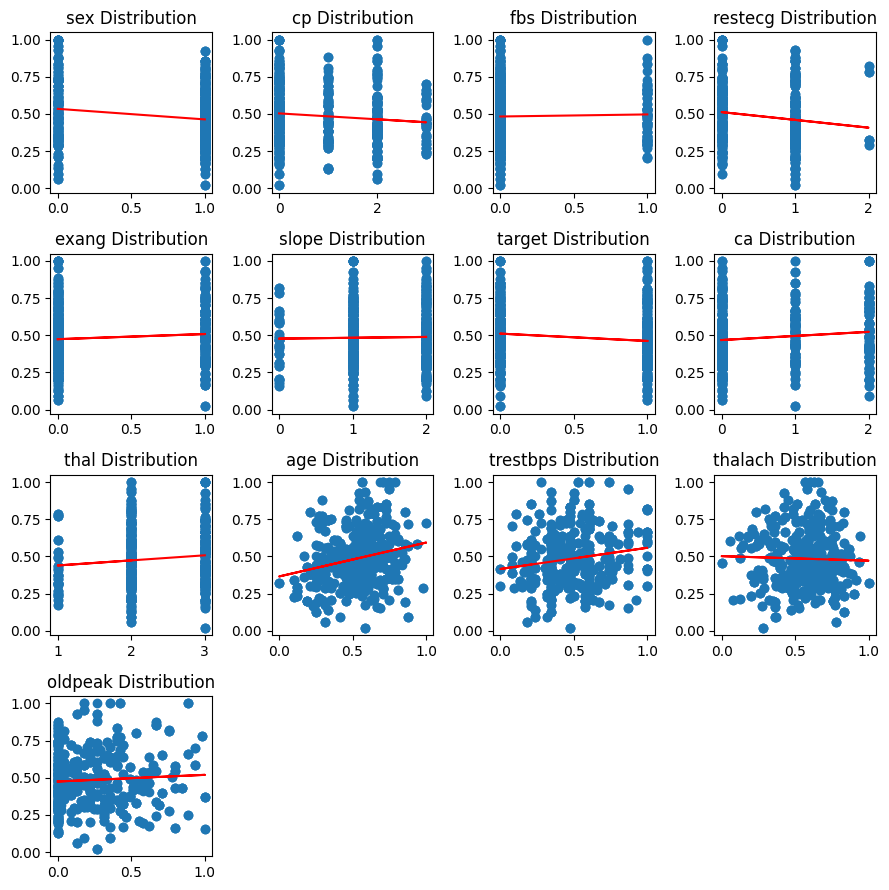

In [328]:
# plotting each feature vs target along with the predicted values for the same feature values.
lin_reg_model = LinearRegression()
plot_scatter_for_df(lin_reg_model, X_train_reg, Y_train_reg, 4, 4 )


In [329]:
# model implementation
lin_reg_model.fit(X_train_reg, Y_train_reg)
predicted_value = lin_reg_model.predict(X_test_reg) # predicted values using Linear regression

# # Evaluation metrics of the linear regression model is included in the last segment
# # if it's needed here, uncomment the next 3 lines
# print(" Mean Squared Error : ", mean_squared_error(Y_test_reg, predicted_value))
# print(" R2 Score : ", r2_score(Y_test_reg, predicted_value))
# print(" Mean Absolute Error : ", mean_absolute_error(Y_test_reg, predicted_value))

###**Classification Task:**
* Train the following models to predict target:
  * Logistic Regression
  * K-Nearest Neighbors (KNN)
  * Naive Bayes

In [330]:
log_reg_model = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=3)
naive_bayes = GaussianNB()


In [331]:
# function to evaluate classification models
def evaluate_model(y_true, y_pred, algo_type):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    print("***************************************")
    print(f"Algorithm: {algo_type}")
    print("***************************************")

    # Create a heatmap visualization
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix : '+ algo_type)
    plt.show()
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print('\n')
    print('\n')


In [332]:
# model implementation
log_reg_model.fit(X_train_pre, Y_train_pre)
predicted_class_log = log_reg_model.predict(X_test_pre) # Predicted classification using logistic regression.

In [333]:
# model implementation
knn.fit(X_train_pre, Y_train_pre)
predicted_class_knn = knn.predict(X_test_pre) # Predicted classification using knn.

In [334]:
# model implementation
naive_bayes.fit(X_train_pre, Y_train_pre)
predicted_class_NB = naive_bayes.predict(X_test_pre) # Predicted classification using logistic regression.

##**Step 5: Evaluate Models on Test Data**


###**For Regression:**

* Evaluate the Linear Regression model using:
  * Mean Absolute Error (MAE)
  * Mean Squared Error (MSE)
  * R-squared (R²)


In [335]:
# checking evaluation metrics of the linear regression model.
print("***************************************")
print("Algorithm: Linear Regression")
print("***************************************")
print(" Mean Absolute Error : ", mean_absolute_error(Y_test_reg, predicted_value))
print(" Mean Squared Error : ", mean_squared_error(Y_test_reg, predicted_value))
print(" R2 Score : ", r2_score(Y_test_reg, predicted_value))


***************************************
Algorithm: Linear Regression
***************************************
 Mean Absolute Error :  0.1578764141180622
 Mean Squared Error :  0.039204313022415754
 R2 Score :  0.07066037156203786


###**For Classification:**

* Evaluate each classification model using:
  * Accuracy
  * Precision
  * Recall
  * F1-Score

***************************************
Algorithm: Logistic Regression
***************************************


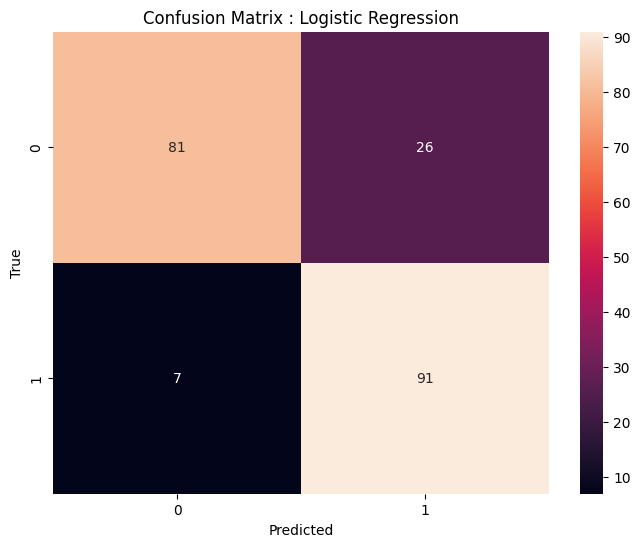

Accuracy: 0.8390243902439024
Precision: 0.7777777777777778
Recall: 0.9285714285714286
F1 Score: 0.8465116279069768




***************************************
Algorithm: KNN
***************************************


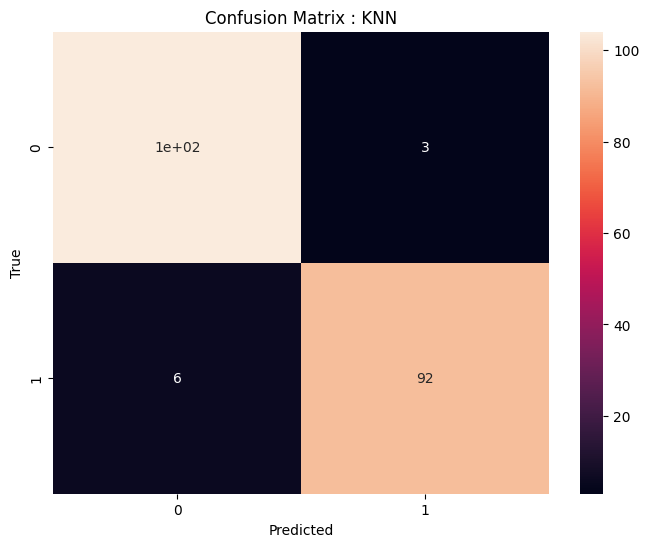

Accuracy: 0.9560975609756097
Precision: 0.968421052631579
Recall: 0.9387755102040817
F1 Score: 0.9533678756476683




***************************************
Algorithm: Naive Bayes
***************************************


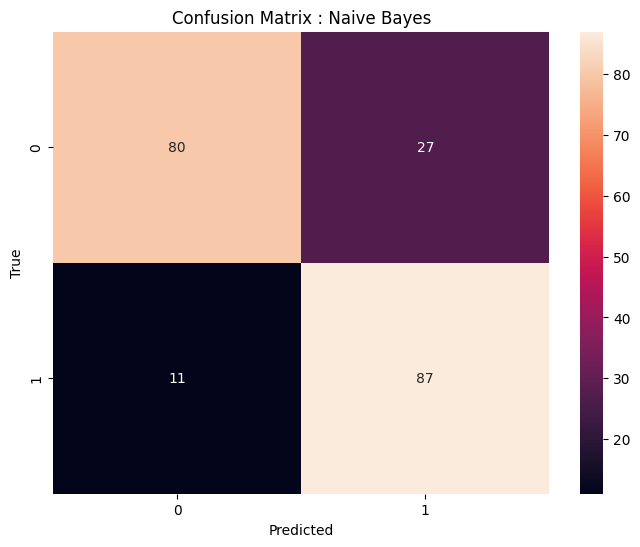

Accuracy: 0.8146341463414634
Precision: 0.7631578947368421
Recall: 0.8877551020408163
F1 Score: 0.8207547169811321






In [336]:
# Displaying classification algorithm results.
evaluate_model(Y_test_pre, predicted_class_log, 'Logistic Regression')
evaluate_model(Y_test_pre, predicted_class_knn, 'KNN')
evaluate_model(Y_test_pre, predicted_class_NB, 'Naive Bayes')

In [337]:
print(" From the evaluation metrics, the order of better results are : ")
print(" 1. KNN")
print(" 2. Logistic Regression")
print(" 3. Naive Bayes")

 From the evaluation metrics, the order of better results are : 
 1. KNN
 2. Logistic Regression
 3. Naive Bayes
